In [66]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
#Data Loading and Structure Understanding (4 Points)

# paths...
BASE = "Database_Realtime"
IMU = os.path.join(BASE, "IMU")
VISION = os.path.join(BASE, "Vision/Webcam")



def load_labels(base_dir, num_samples=10):
    txt_data = {}
    label_files = []


    for root, _, files in os.walk(base_dir):
        for file in files:
            if file.endswith(".txt"):
                label_files.append(os.path.join(root, file))
    

    selected_label_files = random.sample(label_files, min(num_samples, len(label_files)))
    
    for file_path in selected_label_files:
        try:
            with open(file_path, 'r') as f:
                txt_data[file_path] = f.read()
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    
    print(f"Loaded {len(txt_data)} TXT files from {base_dir}")
    return txt_data



def load_images(base_dir, num_samples=10):
    images = []
    filenames = []
    image_files = []


    for root, _, files in os.walk(base_dir):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                image_files.append(os.path.join(root, file))
    
    # select subet
    selected_image_files = random.sample(image_files, min(num_samples, len(image_files)))

    for file_path in selected_image_files:
        try:
            image = Image.open(file_path).convert('RGB')
            images.append(np.array(image))
            filenames.append(file_path)
        except UnidentifiedImageError as e:
            print(f"Error loading image {file_path}: {e}")

    print(f"Loaded {len(images)} images from {base_dir}")
    return np.array(images), filenames


# call funcs
print("Loading Labels...")
txt_files = load_labels(IMU, num_samples=10)  

print("Loading Images...")
images, image_paths = load_images(VISION, num_samples=10)  


print("Image shape:", images.shape)
print("Labels:", len(txt_files))



Loading Labels...
Loaded 10 TXT files from Database_Realtime/IMU
Loading Images...
Loaded 10 images from Database_Realtime/Vision/Webcam
Image shape: (10, 480, 640, 3)
Labels: 10


Skipping line (unexpected format): 87      0.014370      1640798954385      
Skipping line (unexpected format): 88      0.003740      1640798954417      
Skipping line (unexpected format): 89      0.006630      1640798954461      
Skipping line (unexpected format): 90      0.009620      1640798954492      
Skipping line (unexpected format): 91      0.007000      1640798954523      
Skipping line (unexpected format): 92      0.008600      1640798954557      
Skipping line (unexpected format): 93      0.011330      1640798954586      
Skipping line (unexpected format): 94      0.008040      1640798954617      
Skipping line (unexpected format): 95      0.006040      1640798954664      
Skipping line (unexpected format): 96      0.016190      1640798954696      
Skipping line (unexpected format): 97      0.000230      1640798954728      
Skipping line (unexpected format): 98      0.004420      1640798954760      
Skipping line (unexpected format): 99      0.010600      1640798954792      

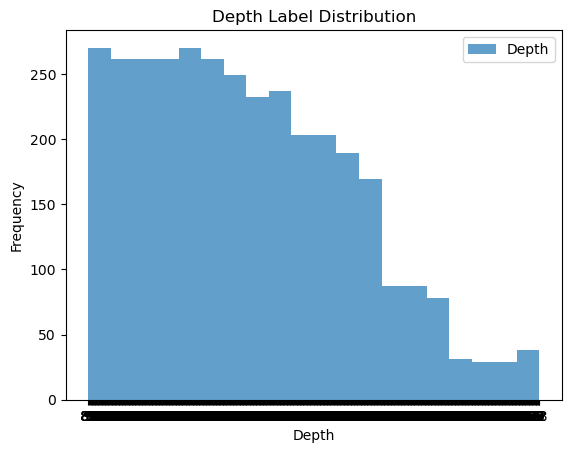

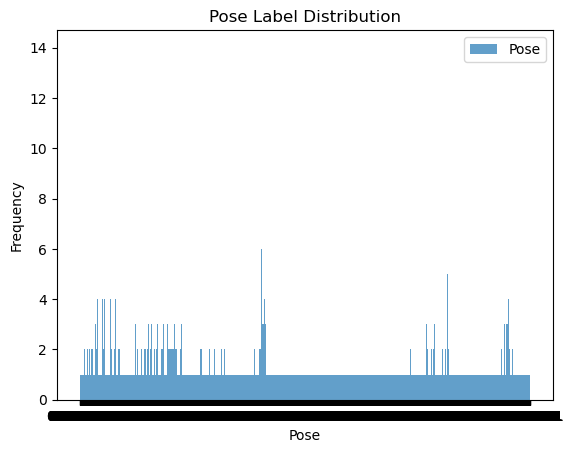

In [ ]:
#updating parsing...
depth_labels = []

depth_labels = depth_labels[:images.shape[0]]
pose_labels = []

for file_path, content in txt_files.items():
    lines = content.splitlines() 
    for line in lines:

        labels = line.split() 
        if len(labels) == 2:
            depth_labels.append(labels[0])  
            pose_labels.append(labels[1])   
        else:
            print(f"Skipping line (unexpected format): {line}")


depth_labels = np.array(depth_labels)
pose_labels = np.array(pose_labels)


if len(pose_labels) == 0:
    print("No pose labels found. Please check the data.")
else:
    # EDA for Depth Labels...
    plt.hist(depth_labels, bins=20, alpha=0.7, label="Depth")
    plt.title("Depth Label Distribution")
    plt.xlabel("Depth")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # EDA for Pose Labels...
    unique_pose_labels = np.unique(pose_labels)
    if len(unique_pose_labels) > 0:
        plt.hist(pose_labels, bins=len(unique_pose_labels), alpha=0.7, label="Pose")
        plt.title("Pose Label Distribution")
        plt.xlabel("Pose")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()
    else:
        print("No unique pose labels found.")


for file_path, content in txt_files.items():
    print(f"Reading {file_path}...")
    lines = content.splitlines()
    for line in lines[:5]:  
        print(line)
    print("-" * 50) 


depth_labels = []
pose_labels = []

for file_path, content in txt_files.items():
    lines = content.splitlines()  
    for line in lines:
        labels = line.split()  
        if len(labels) >= 2:
            depth_labels.append(labels[0])  
            pose_labels.append(labels[1])   
        else:
            print(f"Skipping line (unexpected format): {line}")

depth_labels = np.array(depth_labels)
pose_labels = np.array(pose_labels)


if len(pose_labels) == 0:
    print("No pose labels found. Please check the data.")
else:

    # EDA for Depth Labels...
    plt.hist(depth_labels, bins=20, alpha=0.7, label="Depth")
    plt.title("Depth Label Distribution")
    plt.xlabel("Depth")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # EDA for Pose Labels...
    unique_pose_labels = np.unique(pose_labels)
    if len(unique_pose_labels) > 0:
        plt.hist(pose_labels, bins=len(unique_pose_labels), alpha=0.7, label="Pose")
        plt.title("Pose Label Distribution")
        plt.xlabel("Pose")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()
    else:
        print("No unique pose labels found.")





In [69]:
#Data Augmentation (Optional: 2 Bonus Points)

#data augmentation...
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)




#example...
#augmented_images = next(datagen.flow(images[:5], batch_size=5))



In [ ]:
#Normalization and Splitting (3 Points)

import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.utils import to_categorical

# Normalize images
images = images / 255.0


depth_labels = depth_labels[:images.shape[0]]



X_train, X_temp, y_train, y_temp = train_test_split(
    images, depth_labels, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


X_train_resized = tf.image.resize(X_train, [224, 224]).numpy()
X_val_resized = tf.image.resize(X_val, [224, 224]).numpy()
X_test_resized = tf.image.resize(X_test, [224, 224]).numpy()

print("Resized X_train shape:", X_train_resized.shape)
print("Resized X_val shape:", X_val_resized.shape)
print("Resized X_test shape:", X_test_resized.shape)






Resized X_train shape: (7, 224, 224, 3)
Resized X_val shape: (1, 224, 224, 3)
Resized X_test shape: (2, 224, 224, 3)


In [71]:
#....CLASSIFICATION MODEL....
#Model Design and Implementation (10 Points)

#model 1....
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_simple_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model




In [72]:
#model 2....
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_lenet(input_shape, num_classes):
    model = Sequential([
        Conv2D(6, (5, 5), activation='tanh', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, (5, 5), activation='tanh'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation='tanh'),
        Dense(84, activation='tanh'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model




In [ ]:
#model 3....
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Dropout

def create_resnet(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)


    model = Model(inputs=base_model.input, outputs=predictions)

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [74]:
#Optimization and Regularization (Optional, Up to 4 Bonus Points)

In [ ]:
#-training

from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train) 

#Simple CNN Model
simple_cnn = create_simple_cnn(input_shape=(224, 224, 3), num_classes=10)


history_simple_cnn = simple_cnn.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=20
)

#LeNet Model
lenet_model = create_lenet(input_shape=(224, 224, 3), num_classes=10)

history_lenet = lenet_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=20
)

#ResNet Model
resnet_model = create_resnet(input_shape=(224, 224, 3), num_classes=10)


history_resnet = resnet_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=20
)


y_pred_simple_cnn = simple_cnn.predict(X_test)
y_pred_lenet = lenet_model.predict(X_test)
y_pred_resnet = resnet_model.predict(X_test)



Epoch 1/20


ValueError: in user code:

    File "/Users/annabelsimpson/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "/Users/annabelsimpson/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/annabelsimpson/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "/Users/annabelsimpson/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1127, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/annabelsimpson/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "/Users/annabelsimpson/anaconda3/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/annabelsimpson/anaconda3/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/annabelsimpson/anaconda3/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/annabelsimpson/anaconda3/lib/python3.10/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/annabelsimpson/anaconda3/lib/python3.10/site-packages/keras/src/backend.py", line 5575, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [ ]:
#Evaluation Metrics (5 Points)


from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#one-hot-encoding...
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

#classification report...
print(classification_report(y_true, y_pred))

#confusion matrix...
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()



NameError: name 'np' is not defined

In [ ]:
#Discussions and Analysis (5 Points)

#model Performance:


#accurcy:


#challenges:
#- used base env python
#- kernel needed to be restarted 
#- depth mismatched with images shape, this was affecting my train/test/val shape 


#improvements: